# Iterative Algorithm Design

### Sabryn Bley & Thomas Benzshawel
### CSC 3310 Lab 2
### Fall 2023

## Introduction:
The task of checking if a point is located inside a 2D polygon is important in various real-world fields like computer graphics and geographic information systems. However, it is inefficient to do by hand so an algorithm is needed. In this notebook, we will define our algorithm for determining if a point is inside a polygon. Additionally, when implementing these algorithms in real-world applications, it is important to understand how efficient they are on different datasets. To explore the limitations of the algorithm, this notebook explores the run time for each algorithm on different sized polygons. From this we can create a runtime analysis and identify strengths and limits.

This notebook includes a detailed breakdown of our algorithm; methods for creating polygons, determining if a point is in a polygon, and benchmarking; and runtime analyses. This notebook explores how the algorithm run time changes as the size of the polygon increases. From these tests, we can deduce if the algorithm is practical with specific datasets. To complete these tasks, the notebook uses the functionality of time, random, matplotlib, scipy, numpy, and shapely libraries.

## Set-Up:

The following cell imports the required libraries needed to complete the operations in this notebook. The cell imports the time library, the random library, matplotlib, scipy, numpy, and shapely libraries. The majority of these libraries will be used to benchmark the algorithm. Additionally, they will be used to develop the polygons and points, generate test cases, and create visualizations to create comprehensive analyses from the experimental results.


In [1]:
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from shapely.geometry import Point, LineString, Polygon

## The "Decision Rule":

The decision rule for this algorithm is based on counting the intersections between two lines extending from a master point. They both start at the master point and go towards infinity (one vertically so that y goes to infinity and one horizontally so that x goes to infinity). If the number of intersections between these lines and the polygon edges is an odd number, the algorithm concludes that the master point is inside the polygon. Conversely, if the number of intersections is an even number, the algorithm determines that the master point lies outside the polygon. This approach uses the idea that the lines crossing the polygon's boundaries will intersect with its edges an odd number of times when the point is inside and an even number of times when the point is outside. This assumes that master points lying on the polygon's boundary is not counted as a intersection. This algorithm assumes that the polygon is simple, closed that allows for this to rule to hold when determining where a point lies regarding a polygon. 

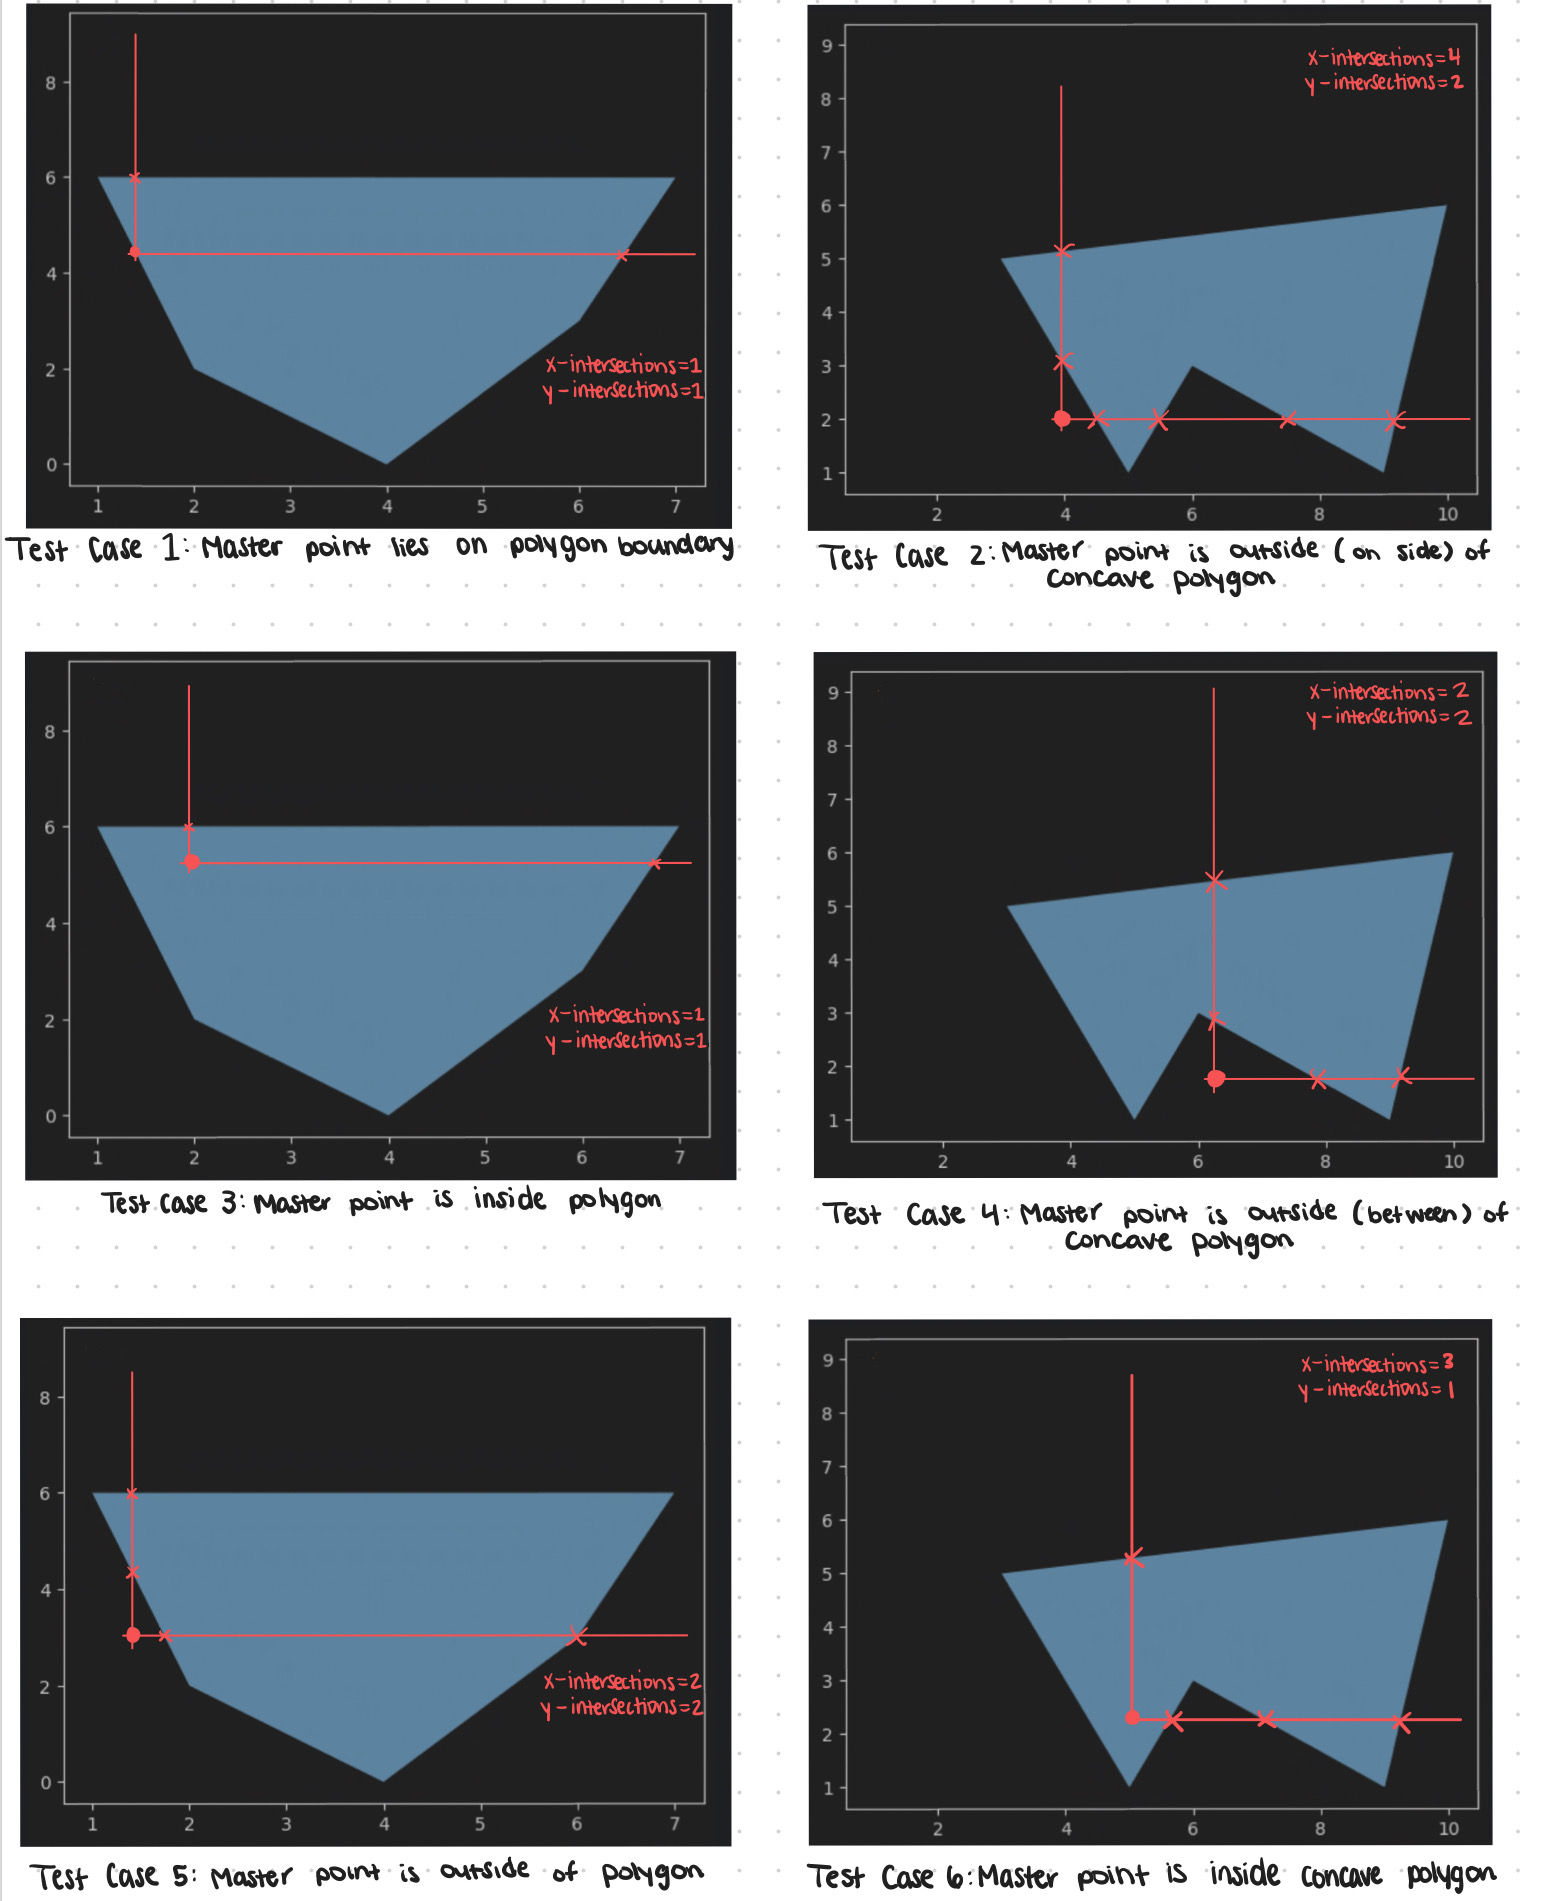

## Pseudocode:

    def is_inside(polygon: list, master_points: list):
        points_inside = []
        for master_point in master_points:
      
            vertical_infinity = line(master_point, (master_point.x, infinity))
            horizontal_infinity = line(master_point, (infinity, master_point.y))
            
            intersection_x = 0
            intersection_y = 0
           
	        for line in the polygon:
                if horizontal_infinity intersects line:
		            intersection_x ++

		        if vertical_infinity intersects line:
		            intersection_y ++

            points_inside.append(intersection_y % 2 != 0 and intersection_x % 2 != 0)

	    return points_inside

## Justification:

Initialization: Number of intersections are 0 to start.
    This algorithm is correct at the initialization of the algorithm because the number of x and y intersections are both set to zero. This is because the rays from the master point have not been compared for intersection checking with the polygon's boundaries. This means the algorithm's invariant (the intersections) is neutral and ready to increment when checking for intersections. This allows the algorithm to accurately count intersections and determine point relation to the polygon regardless of if the point is inside or outside.
    
Maintenance: Compare master point rays and polygon edges for intersections. 
    While the algorithm is executing, the intersection count is carefully incremented as the master point's rays are checked for intersections with the polygon edges. Each time a ray intersects with a polygon edge, the count is incremented by one. By incrementing through each edge of the polygon, it prevents intersections from not being counted or being counted multiple times. This allows for the algorithm to have accurate intersection counts. Ultimately, this allows for the accurate calculation of if the point lie in or out of the polygon. 
   
Termination: No more comparisons between master point lines and polygon lines.
    This algorithm ends when there are no more polygon edges to compare with the master point's rays. This occurs when the algorithm has examined every possible spot for intersection. Then,  there is no opportunity for the master point's rays to intersect with the polygon. Therefore,  the intersection count can no longer be incremented. Once the count is finalized, then it can be analyzed to determine the points relation to the polygon.

## Worst-Case Analysis:

Assumptions:
- The list of master points is not empty.
- The list of polygon vertices is greater than or equal to three.

Other Notes:
- Worst Case: The number of polygon vertices is very large & lots of master points.
- Intersection is an O(n) operation when the number of vertices are very large.

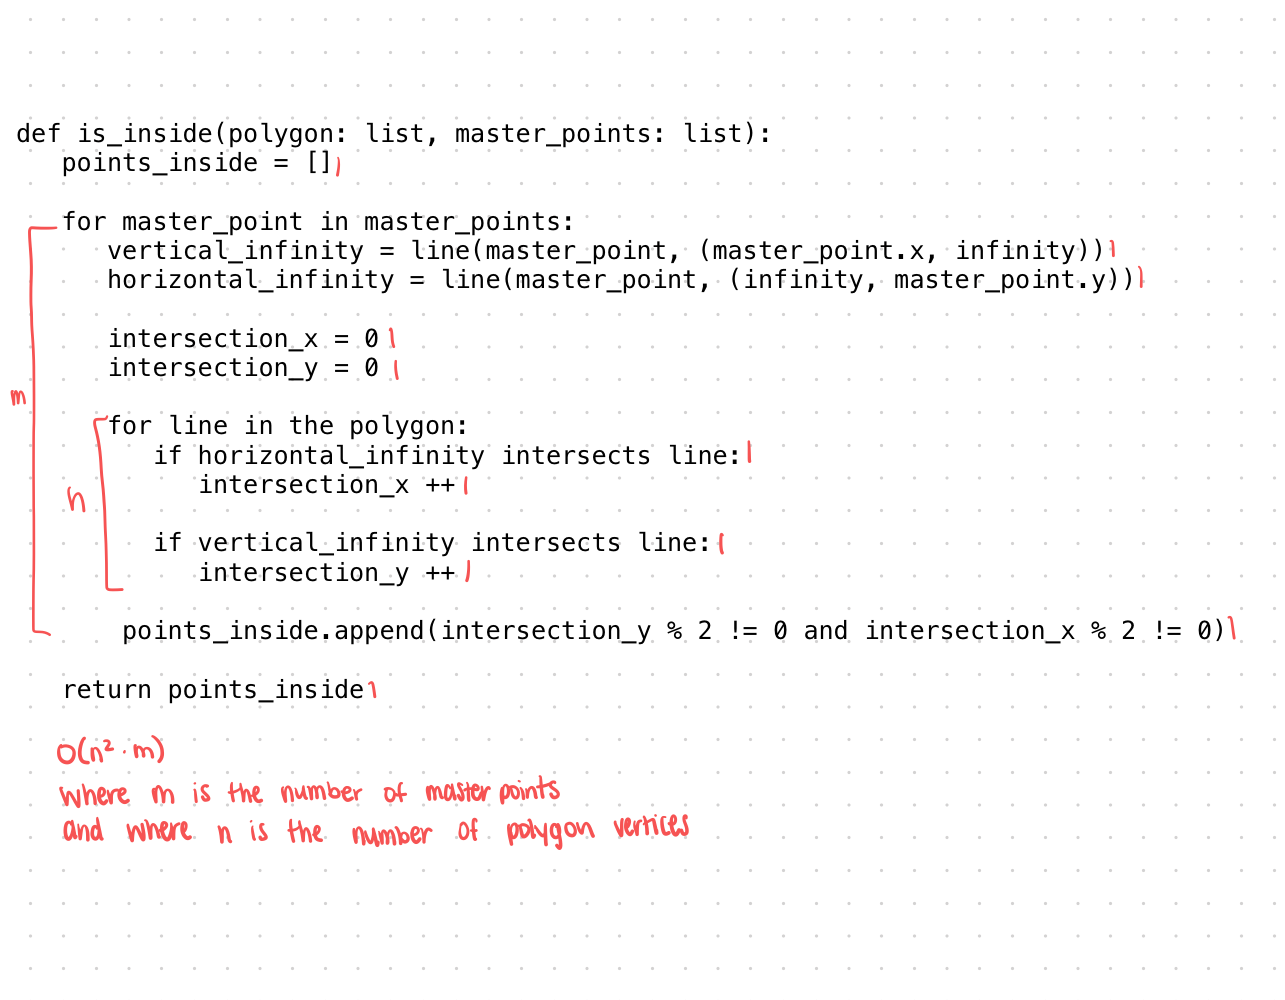

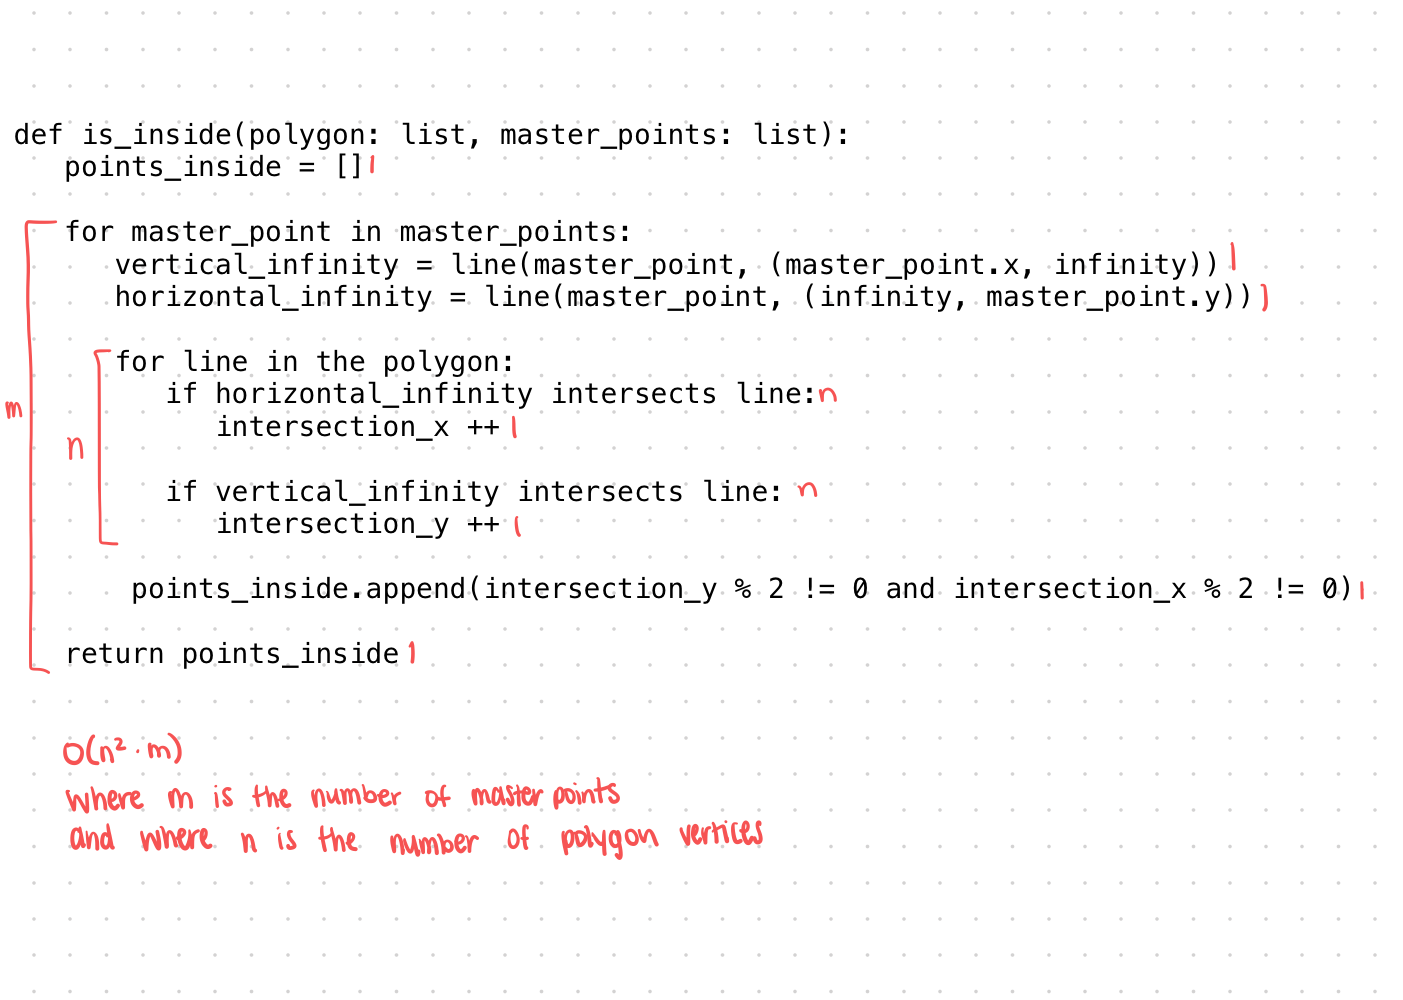

## The Code:

**Function Declarations:**

The following cell defines a helper function "is_clockwise". This function accepts three points (at a time) that make up the polygon. It checks if the points are clockwise. If this is true, the points are problematic and violate a simple, closed polygon. If the points are valid, is returned.

In [11]:
def is_clockwise(p1, p2, p3):
    '''
    This function checks whether three points violate making a simple, closed polygon.
    If the points are clockwise (out of order), the points violate the simple, closed 
    polygon. If the points make a simple, closed polygon are returned.
    
    :param p1: The (x, y) coordinates representing the first point.
    :param p2: The (x, y) coordinates representing the middle point.
    :param p3: The (x, y) coordinates representing the last point.
    :return invalid: True if the points violate being a simple, closed polygon. False otherwise. 
    '''

    # CHECK IF POINTS ARE CLOCKWISE
    invalid = (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x) <= 0
        
    # RETURN IF POINTS VIOLATE A SIMPLE, CLOSED POLYGON OR NOT
    return invalid

The following cell defines a helper function to determine if a polygon intersects with itself. This is to determine if the generated points create a valid polygon. It does this by using the shapely library's intersect() method.

In [243]:
def intersects(polygon):
    '''
    This function determines if the polygon intersects with itself. It does this
    by using Shapely's intersect() against each line of the polygon. If it does 
    intersect, then it violates being a simple, closed polygon. If it intersects 
    with itself, the function returns true, else false.
    
    :param polygon: The list of points representing the polygon.
    :return: True if there is no intersections, false otherwise.
    '''
    
    # CREATE SHAPELY POLYGON
    polygon_vertices = Polygon(polygon)

    # CREATE SHAPELY LINES
    lines = []
    for i in range(len(polygon) - 1):
        line = LineString([polygon[i], polygon[i + 1]])
        lines.append(line)
    
    # CHECK FOR INTERSECTIONS
    intersection = 0
    for line in lines:
        if line.intersects(polygon_vertices.boundary) and not line.touches(polygon_vertices):
            intersection = intersection + 1
  
    return intersection == 0

The following cell defines a helper function "create_random_point". This function takes in the minimum and maximum the x and y coordinate can be and return it as a tuple.

In [4]:
def create_random_point(x_min = 0, x_max = 10, y_min = 0, y_max = 10):
    '''
    This function creates a random point (x, y). Additionally, this method restricts 
    the point to be in the first quadrant (maxing at a value of ten).
    
    :param x_min: The minimum value the x-coordinate could be. Defaults to 0.
    :param x_max: The maximum value the x-coordinate could be. Defaults to 10.
    :param y_min: The minimum value the y-coordinate could be. Defaults to 0.
    :param y_max: The maximum value the y-coordinate could be. Defaults to 10.
    :return: The point as a Shapely point.
    '''
    x = random.randint(x_min, x_max) # create random x-coordinate
    y = random.randint(y_min, y_max) # create random y-coordinate
    return Point(x, y)

The following cell defines a helper function "create_random_polygon". This function generates random points using the "create_random_point" function to create a polygon. This function calls the "is_clockwise" helper function to check that all the points make a simple, closed polygon. If the points violate the polygon, they are removed. After these checks, it assures that there are the required amount of points. Additionally, the function uses the intersects() helper function to make sure the polygon doesn't self-intersect. If there aren't enough points or the polygon self-intersects, the entire process is repeated until a simple, closed polygon is created. Then the points are returned. The first point is added to the end of the list because it is assumed the last point connects back.

In [246]:
def create_random_polygon(num_points = 5):
    """
    Generate a random simple, closed polygon by generating a list of points in order.
    This method creates a polygon with the desired amount of points. However, it restricts the polygons 
    to have at least three points. Additionally, this method restricts the polygons to have coordinates 
    in the first quadrant (maxing at a value of ten). It is assumed the last point connects back to the 
    first point in the list.

    :param num_points: The number of points in the polygon
    :return points: A list of tuples that represent (x, y) coordinates for each point in the polygon.
    """
    # CREATE BOOLEAN TO TRACK IF POINTS HAVE BEEN GENERATED
    valid = False
    # CREATE LIST TO SAVE CREATED POINTS
    points = []
    
    # CHECK THAT THE NUMBER OF POINTS CAN MAKE A POLYGON
    if num_points < 3:
        print("Number of points must be greater than three to be a polygon.")
        valid = True # skip point generation
    
    # GENERATE POINTS
    while not valid:

        # CREATE RANDOM POINTS
        for i in range(num_points - 1): 
            points.append(create_random_point()) # save new point
    
        # SORT POINTS BASED OFF OF X COORDINATE
        points.sort(key = lambda x: x.x)

        # CHECK FOR PROBLEMATIC POINTS
        i = 0
        while i < len(points) - 2:
            if is_clockwise(points[i], points[i + 1], points[i + 2]):
                points.pop(i + 1) # Remove the middle point
            else:
                i += 1 # Move to next three points
        
        # CHECK THERE IS MORE THAN TWO POINTS
        if len(points) == num_points and intersects(points):
            valid = True
        
    # ADD FIRST POINT TO CREATE CLOSED POLYGON
    points.append(points[0])
    
    # RETURN POINTS
    return points

The following cell defines a helper function to create a point that is unique to any points in the polygon.

In [248]:
def create_random_master_point(polygon):
    '''
    This function creates a unique master point from any of the polygon vertices.
    
    :param polygon: The points that represent a polygon.
    :return: The unique point.
    '''
    # CREATE INITIAL POINT 
    point = create_random_point()

    # CREATE NEW POINT UNTIL MASTER POINT IS UNIQUE
    while any(point.equals(p) for p in polygon):
        point = create_random_point()
        
    # RETURN POINT
    return point

The following cell defines a function is_inside(). This is the implementation of our algorithm. It takes in a list of master points and list of points that represent the polygon. The algorithm then goes through, and determines if each master point is in the polygon. TODO ADD ASSUMPTIONS

In [258]:
def is_inside(master_points: list, polygon: list):
    """
    This method goes through a list of master points and determines if each master point 
    is inside or outside a polygon (a list of (x, y) coordinates).
    It does this by implementing the TODO
    TODO - ADD ASSUMPTIONS
    :param master_points: The list of points.
    :param polygon: The list of points that represent a simple, closed polygon. 
                    (Last point connects back to the first point.)
    :return points_inside: A list of boolean values that represent if the points were inside the polygon. 
    True if the master point is inside the polygon. False otherwise.
    """
    # CREATE SHAPELY POLYGON
    polygon = Polygon(polygon)
    
    # CREATE LIST TO STORE EACH POINTS RESULTS
    points_inside = []

    # COUNTS START AS 0
    intersection_y = 0
    intersection_x = 0
    
    # COMPARE EACH MASTER POINT
    for master_point in master_points:
        # CREATE A HORIZONTAL & VERTICAL LINE FROM MASTER POINT TO "INFINITY"
        horizontal = LineString([master_point, Point(1e9, master_point.y)]) 
        vertical = LineString([master_point, Point(master_point.x, 1e9)])
        
        # COUNT THE HORIZONTAL AND VERTICAL LINES INTERSECTIONS WITH THE POLYGON
        if horizontal.intersects(polygon.boundary):
            intersection_x = intersection_x + 1
        if vertical.intersects(polygon.boundary):
            intersection_y = intersection_y + 1
        
        # CALCULATE IF THE POINT IS INSIDE BASED ON NUMBER OF INTERSECTIONS
        points_inside.append((intersection_y > 0 and intersection_y % 2 != 0) and (intersection_x > 0 and intersection_x % 2 != 0))

    # RETURN THE DETERMINATIONS FOR EACH MASTER POINT
    return points_inside

The following cell defines a helper function visualize_polygon(). This function takes in the polygon and the master points and plots them using the matplotlib library.

In [90]:
def visualize_polygon(polygon, points):
    '''
    This function visualizes the polygon and points using the matplotlib library.
    
    :param polygon: The polygon.
    :param points: The master points.
    '''
    # REMOVE THE END DOT TO AVOID MATPLOTLIB ERRORS
    polygon.pop()

    # COLLECT ALL X AND Y COORDINATES
    x = [vertice.x for vertice in polygon]
    y = [vertice.y for vertice in polygon]
    
    # PLOT THE POLYGON
    plt.fill(x, y)

    # PLOT MASTER POINTS
    for p in points:
        plt.scatter(p.x, p.y, cmap = "red")

    # DISPLAY FIGURE
    plt.show()
    
    # ADD THE END DOT TO HAVE VERTICES CONNECT CORRECTLY 
    polygon.append(polygon[0])

The following cell defines a helper function that benchmarks the algorithm with a specified polygon and points.

In [10]:
def benchmark(polygon, points):
    '''
    This function uses the time library to benchmark the algorithm. The function takes in
    the polygon and the point that is being tested. It then times the algorithm and returns the time as a long.

    :param polygon: The Python list of coordinates that represent the polygon being benchmarked.
    :param points: The points that are being tested (in or out of the polygon).
    :return elapsed: The benchmark time for the algorithm to determine if the points is in the polygon or not. 
    This time is represented as a long.
    '''

    # BENCHMARK
    start_time = time.perf_counter()
    is_inside(points, polygon)
    end_time = time.perf_counter()

    # CALCULATE THE TIME ELAPSED
    elapsed = end_time - start_time
    return elapsed

**Algorithm Function Testing:**

The following cell tests that the algorithm shows the point is outside of the polygon. The polygon and points are hardcoded for proof but were initially randomly generated. The result should show true.

Polygon:  [<POINT (1 9)>, <POINT (1 1)>, <POINT (6 1)>, <POINT (8 2)>, <POINT (10 2)>, <POINT (1 9)>]
Point:  POINT (5 10)
polygon:  [<POINT (1 9)>, <POINT (1 1)>, <POINT (6 1)>, <POINT (8 2)>, <POINT (10 2)>, <POINT (1 9)>]


C:\Users\bleys\AppData\Local\Temp\ipykernel_4244\1634521980.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p.x, p.y, cmap = "red")


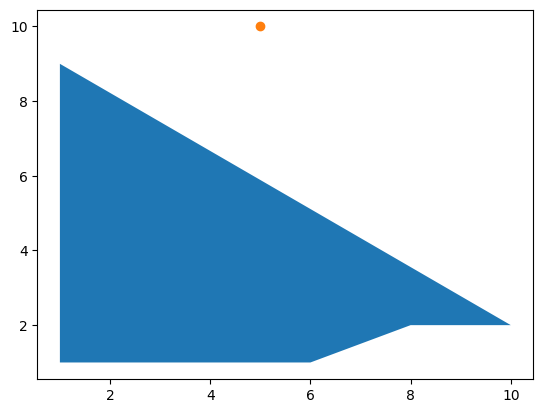

Result:  [False]


In [250]:
# CREATE POLYGON
testing_polygon = [Point(x, y) for x, y in [(1, 9), (1, 1), (6, 1), (8, 2), (10, 2), (1, 9)]]
print('Polygon: ', testing_polygon)

# CREATE MASTER POINT
point = Point(5, 10)
print('Point: ', point)

# VISUALIZE
visualize_polygon(testing_polygon, [point])

# RUN ALGORITHM
print('Result: ', is_inside([point], testing_polygon))

The following cell tests that the algorithm shows the point is on the edge of the polygon. The polygon and points are hardcoded for proof but were initially randomly generated. The result should show true.

Polygon:  [<POINT (0 6)>, <POINT (3 4)>, <POINT (8 1)>, <POINT (10 0)>, <POINT (10 8)>, <POINT (0 6)>]
Point:  POINT (10 5)
polygon:  [<POINT (0 6)>, <POINT (3 4)>, <POINT (8 1)>, <POINT (10 0)>, <POINT (10 8)>, <POINT (0 6)>]


C:\Users\bleys\AppData\Local\Temp\ipykernel_4244\1634521980.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p.x, p.y, cmap = "red")


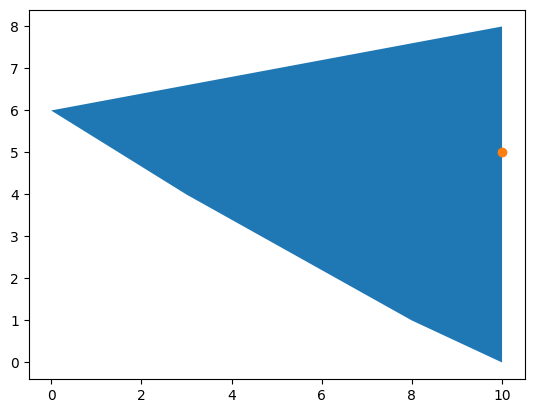

Result:  [True]


In [253]:
# CREATE POLYGON
testing_polygon = [Point(x, y) for x, y in [(0, 6), (3, 4), (8, 1), (10, 0), (10, 8), (0, 6)]]
print('Polygon: ', testing_polygon)

# CREATE MASTER POINT
point = Point(10, 5)
print('Point: ', point)

# VISUALIZE
visualize_polygon(testing_polygon, [point])

# RUN ALGORITHM
print('Result: ', is_inside([point], testing_polygon))

The following cell tests that the algorithm shows the point is inside the polygon. The polygon and points are hardcoded for proof but were initially randomly generated. The result should show true.

Polygon:  [<POINT (0 8)>, <POINT (1 1)>, <POINT (2 1)>, <POINT (7 2)>, <POINT (9 8)>, <POINT (0 8)>]
Point:  POINT (2 6)
polygon:  [<POINT (0 8)>, <POINT (1 1)>, <POINT (2 1)>, <POINT (7 2)>, <POINT (9 8)>, <POINT (0 8)>]


C:\Users\bleys\AppData\Local\Temp\ipykernel_4244\1634521980.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p.x, p.y, cmap = "red")


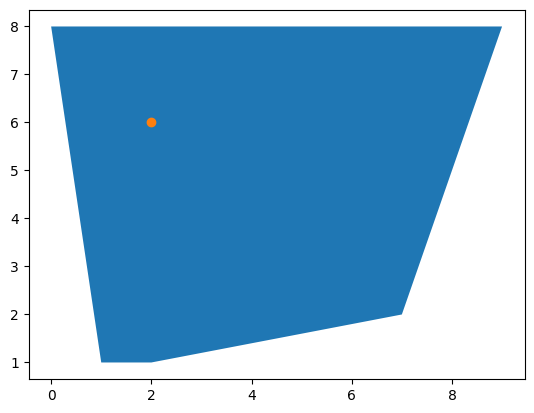

Result:  [True]


In [259]:
# CREATE POLYGON
testing_polygon = [Point(x, y) for x, y in [(0, 8), (1, 1), (2, 1), (7, 2), (9, 8), (0, 8)]]
    
print('Polygon: ', testing_polygon)

# CREATE MASTER POINT
point = Point(2, 6)
print('Point: ', point)

# VISUALIZE
visualize_polygon(testing_polygon, [point])

# RUN ALGORITHM
print('Result: ', is_inside([point], testing_polygon))

### Benchmarks:
TODO
- number of points in a polygon
- number of random points

The following cell creates polygons (Python lists of coordinates) with differing number of vertices. These will be used to compare the runtime of the algorithm with polygons with varying number of vertices.

In [260]:
# CREATE POLYGONS FOR BENCHMARKING
polygon_3 = create_random_polygon(3)
print('3')
polygon_7 = create_random_polygon(7)
print('7')
polygon_11 = create_random_polygon(11)
print('11')
polygon_15 = create_random_polygon(15)
print('15')
# IT TAKES FOREVER TO DO 17
#polygon_17 = create_random_polygon(17)
#print('17')

3
7
11
15


KeyboardInterrupt: 

The following cell creates random points. Additionally, it creates lists of different amounts of points. These will be used to compare the runtime of the algorithm with when checking if multiple points are in the polygons.

In [261]:
# LIST OF VERTICES IN ALL POLYGONS
total_vertices = polygon_3.copy() + polygon_7.copy() + polygon_11.copy() + polygon_15.copy() #+ polygon_17.copy() TODO - UNCOMMENT

# CREATE MASTER POINTS FOR BENCHMARKING
point_1 = create_random_master_point(total_vertices)
point_2 = create_random_point(total_vertices)
point_3 = create_random_point(total_vertices)

# CREATE LISTS OF VARYING AMOUNTS OF MASTER POINTS
one_point = [point_1]
two_points = [point_1, point_2]
three_points = [point_1, point_2, point_3]

[<POINT (1 1)>, <POINT (3 0)>, <POINT (6 8)>, <POINT (1 1)>, <POINT (0 1)>, <POINT (2 0)>, <POINT (4 1)>, <POINT (7 1)>, <POINT (8 0)>, <POINT (9 1)>, <POINT (10 3)>, <POINT (0 1)>, <POINT (0 8)>, <POINT (0 5)>, <POINT (2 0)>, <POINT (3 0)>, <POINT (4 0)>, <POINT (5 3)>, <POINT (6 0)>, <POINT (7 0)>, <POINT (8 3)>, <POINT (10 0)>, <POINT (10 6)>, <POINT (0 8)>, <POINT (0 4)>, <POINT (0 1)>, <POINT (1 0)>, <POINT (2 3)>, <POINT (2 0)>, <POINT (3 0)>, <POINT (4 1)>, <POINT (5 4)>, <POINT (5 1)>, <POINT (6 0)>, <POINT (7 1)>, <POINT (8 0)>, <POINT (9 0)>, <POINT (10 0)>, <POINT (10 6)>, <POINT (0 4)>]


In [256]:
#visualize_polygon(create_random_polygon(), one_point)

In [65]:
# visualize_polygon(polygon_3, two_points)

In [66]:
# visualize_polygon(polygon_3, three_points)

**Check One Point In Polygons With Varying Numbers of Vertices:**

In [16]:
# CREATE LIST TO STORE THE BENCHMARKS WHEN CHECKING ONLY ONE POINT
check_1_point = list()

# RUN AND ADD BENCHMARKS TO LIST FOR DIFFERENT POLYGONS 
check_1_point.append(benchmark(polygon_3, one_point))
check_1_point.append(benchmark(polygon_7, one_point))
check_1_point.append(benchmark(polygon_11, one_point))
check_1_point.append(benchmark(polygon_15, one_point))
#check_1_point.append(benchmark(polygon_17, one_point))

# DISPLAY RESULTS
print(check_1_point)

[4.799978341907263e-06, 3.1999952625483274e-06, 3.0999945010989904e-06, 3.6999990697950125e-06]


**Check Two Points In Polygons With Varying Numbers of Vertices:**

In [17]:
# CREATE LIST TO STORE THE BENCHMARKS WHEN CHECKING TWO POINTS
check_2_point = list()

# RUN AND ADD BENCHMARKS TO LIST FOR DIFFERENT POLYGONS
check_2_point.append(benchmark(polygon_3, two_points))
check_2_point.append(benchmark(polygon_7, two_points))
check_2_point.append(benchmark(polygon_11, two_points))
check_2_point.append(benchmark(polygon_15, two_points))
# check_2_point.append(benchmark(polygon_24, two_points))

# DISPLAY RESULTS
print(check_2_point)

[6.799993570894003e-06, 6.700021913275123e-06, 7.700000423938036e-06, 8.800008799880743e-06]


**Check Three Points In Polygons With Varying Numbers of Vertices:**

In [18]:
# CREATE LIST TO STORE THE BENCHMARKS WHEN CHECKING THREE POINTS
check_3_point = list()

# RUN AND ADD BENCHMARKS TO LIST FOR DIFFERENT POLYGONS
check_3_point.append(benchmark(polygon_3, three_points))
check_3_point.append(benchmark(polygon_7, three_points))
check_3_point.append(benchmark(polygon_11, three_points))
check_3_point.append(benchmark(polygon_15, three_points))
# check_3_point.append(benchmark(polygon_24, three_points))

# DISPLAY RESULTS
print(check_3_point)

[7.199996616691351e-06, 6.199989002197981e-06, 6.89999433234334e-06, 8.400005754083395e-06]


### Analysis: TODO
7. A table of your test cases, the answers you expect, and the answers returned by running your
implementation of the algorithm.
6. A table and graph from benchmarking your implementation on problem instances of different
sizes. The benchmarks should support your theoretically-derived run time.


**Calculating Run Times:** TODO

The following cell defines a Python list for the different number of polygon vertices used during benchmarking.

In [19]:
# DEFINE THE DIFFERENT POLYGON SIZES
#polygon_sizes = [3, 7, 11, 15, 24]
polygon_sizes = [3, 7, 11, 15]

The following cell calculates the slope for the run times for the different amount of master points being tested. This is done using the numpy library and linregress object from the scipy.stats library.

In [20]:
# CALCULATE THE SLOPE FOR EACH CASE 
check_1_slope, b, _, _, _ = linregress(np.log(polygon_sizes), np.log(check_1_point))
check_2_slope, b, _, _, _ = linregress(np.log(polygon_sizes), np.log(check_2_point))
check_3_slope, b, _, _, _ = linregress(np.log(polygon_sizes), np.log(check_3_point))

# PRINT RESULTS
print("Check One Point: ", check_1_slope)
print("Check Two Points: ", check_2_slope)
print("Check Three Points: ", check_3_slope)

Check One Point:  -0.20064608831330372
Check Two Points:  0.14903753052605206
Check Three Points:  0.0692301749426535


**Visualizations:** TODO


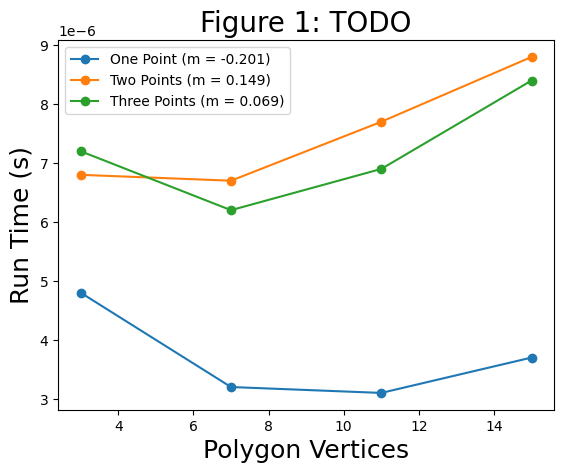

In [22]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(polygon_sizes, check_1_point,
        label = ('One Point (m = ' + "{:.3f}".format(check_1_slope) + ')'),
        marker = 'o', linestyle = '-')
ax.plot(polygon_sizes, check_2_point,
        label = ('Two Points (m = ' + "{:.3f}".format(check_2_slope) + ')'),
        marker = 'o', linestyle = '-')
ax.plot(polygon_sizes, check_3_point,
        label = ('Three Points (m = ' + "{:.3f}".format(check_3_slope) + ')'),
        marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('Polygon Vertices', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 1: TODO',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

**Comparison Table:**

#### Table 1: The Theoretical & Estimated Run Time Functions for Is-Inside Algorithm for each case
| Number of Points Being Checked | Slope (m) | Theoretical Run Time Functions | Estimated Run Time Functions |
|--------------------------------|-----------|--------------------------------|------------------------------|
| 1                              |           |                                |                              |                     
| 2                              |           |                                |                              |                    
| 3                              |           |                                |                              |       
TODO              

### Conclusion: TODO